# OASIS INFOBYTE DATASCIENCE INTERNSHIP

## TASK 1- IRIS FLOWER CLASSIFICATION



### Akshay Saini

In [36]:
#import the required libraries
import numpy as np
import pandas as pd

In [37]:
#bringing the csv file to a pandas dataframe
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
iris_df.shape

(150, 6)

In [39]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
#we don't need the 1st column so let's drop that
iris_df.drop("Id",axis = 1, inplace = True)


In [42]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
#check for null values
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Histograms

In [45]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

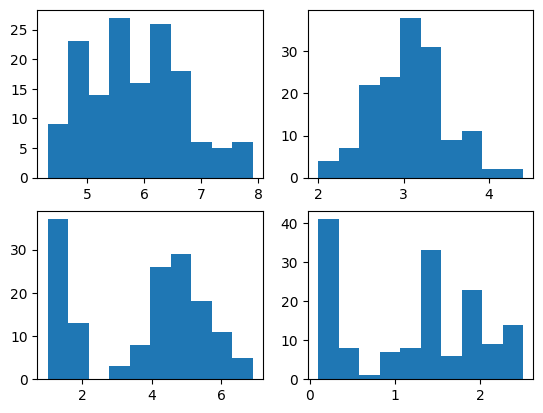

In [46]:
plt.subplot(2,2,1)
plt.hist(iris_df['SepalLengthCm'])
plt.subplot(2,2,2)
plt.hist(iris_df['SepalWidthCm'])
plt.subplot(2,2,3)
plt.hist(iris_df['PetalLengthCm'])
plt.subplot(2,2,4)
plt.hist(iris_df['PetalWidthCm'])
plt.show

## Scatter Plots

In [47]:
colors = ['red','yellow','green']
species = iris_df["Species"].unique()

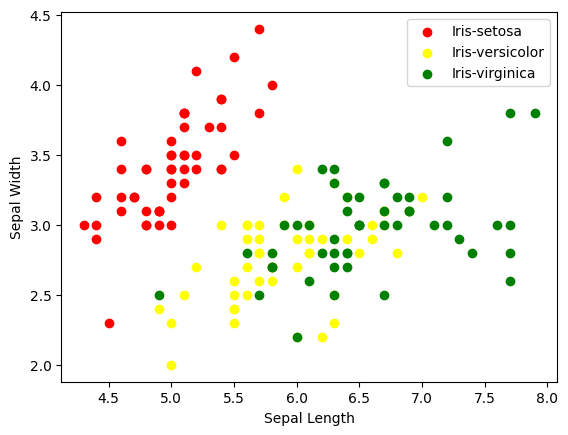

In [48]:
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

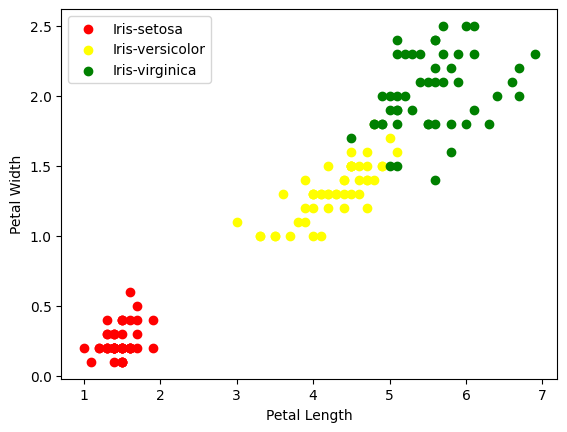

In [49]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

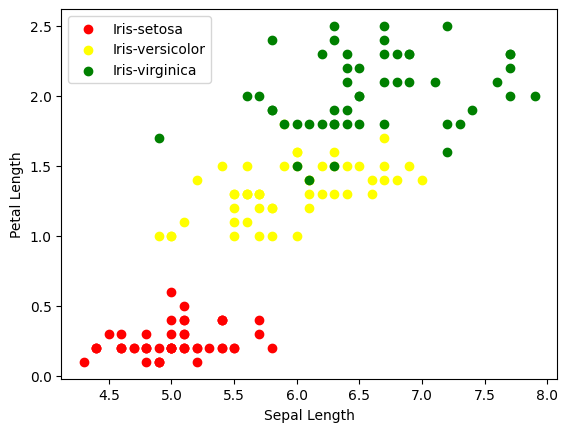

In [50]:
for i in range(3):
    x=iris_df[iris_df ['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

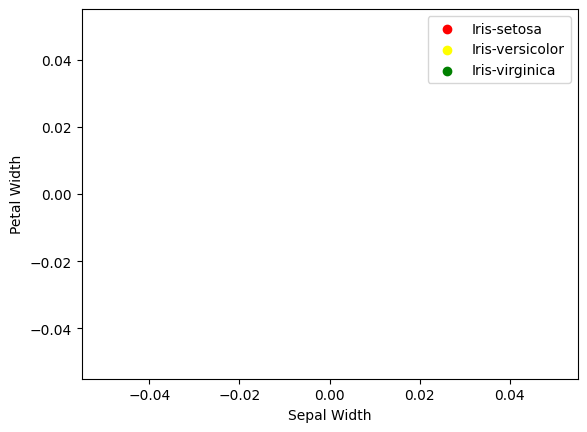

In [59]:
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

#### Correalation Matrix to check inter-depandability of columns.

In [52]:
iris_df[iris_df.columns[:-1]].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Label Encoding 
 As the output is a classification of strings we need to import Label Encoder to make that numeric

In [60]:
from sklearn.preprocessing import LabelEncoder 

In [61]:
label_encoder = LabelEncoder()

In [62]:
iris_df['Species']= label_encoder.fit_transform(data['Species'])

In [63]:
# 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2
iris_df['Species'].unique()

array([0, 1, 2])

### Seperating the Features and Targeted columns

In [65]:

features_df=iris_df.drop(columns=['Species'])
target_df=iris_df['Species']

In [66]:
features_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
target_df.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [68]:
# train test split  70% in train
from sklearn.model_selection import train_test_split

In [69]:
# train test split  70% in train
x_train,x_test,y_train,y_test=train_test_split(features_df, target_df, test_size=0.3)

In [70]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
57,4.9,2.4,3.3,1.0
69,5.6,2.5,3.9,1.1
70,5.9,3.2,4.8,1.8
77,6.7,3.0,5.0,1.7
117,7.7,3.8,6.7,2.2


In [71]:
y_test.head()

86     1
112    2
55     1
2      0
54     1
Name: Species, dtype: int32

### Import required libraries 

In [73]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [74]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')

In [75]:
scaler=StandardScaler()

In [76]:
# KNN(k nearest neighbors) algorithm
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn= KNeighborsClassifier()

In [78]:
pipe = make_pipeline(column_trans,scaler,knn)

In [79]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [80]:
y_pred_knn= pipe.predict(x_test)

In [81]:
r2_score(y_test,y_pred_knn)

0.927652733118971

In [82]:
#logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [83]:
lr= LogisticRegression()

In [84]:
pipe=make_pipeline(column_trans,scaler,lr)

In [85]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [86]:
y_pred_lr=pipe.predict(x_test)

In [87]:
r2_score(y_test,y_pred_lr)

0.9638263665594855

In [88]:
#testing the pipe is predicting or not
pipe.predict([[1.2,1.5,1.6,1.2]])

array([0])

In [89]:
# saving the model
import pickle

In [91]:
pickle.dump(pipe,open('iris_flower.pkl','wb'))